In [2]:
print('dupa')

dupa


## Testing

In [4]:
import numpy as np
np.random.seed(0)
def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output
values = np.random.randint(1, 10, size=5)
compute_reciprocals(values)
big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

4.34 s ± 148 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Fun with all frameworsk
First we get heights of all US presidents.

In [8]:
import pandas as pd
data = pd.read_csv('../data/president_heights.csv')
heights = np.array(data['height(cm)'])

## Creating plot
Now we will use pyplot and seaborn to create simple plot


Text(0, 0.5, 'Number')

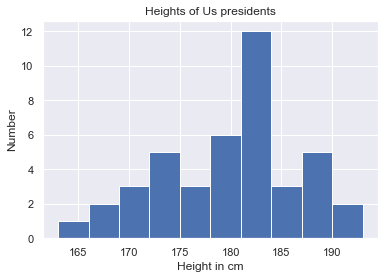

In [9]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
plt.hist(heights)
plt.title("Heights of Us presidents")
plt.xlabel("Height in cm")
plt.ylabel("Number")

## Broadcasting
Broadcasting lets you fulfil matrices which are not in correct shapes to use ufuncs on them.
There are 3 steps which sets the rules of broadcasting:
1. First rule  If the matrcies differ in shape, smaller one is `padded` with ones on its leading (left) side
2. Second rule If the shape of the two arrays does not match in any dimension,
the array with shape equal to 1 in that dimension is stretched to match the other shape.
3. Third rule  If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

In [10]:
smaller_array = np.ones((3,1))
smaller_vector = np.arange(3)
print('smaller array')
print(smaller_array)
print('smaller vector')
print(smaller_vector)
sum = smaller_array + smaller_vector
print('sum')
print(sum)

smaller array
[[1.]
 [1.]
 [1.]]
smaller vector
[0 1 2]
sum
[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


## Broadcasting continued
Broadcasting helps with plotting a two-dimensional function like f(x,y)
and for showing it I will use matplotlib.

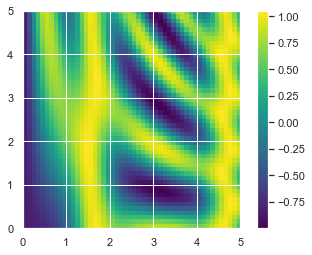

In [12]:
import matplotlib.pyplot as plt
x = np.linspace(0,5,50)
y = np.linspace(0,5,50)[:, np.newaxis]
z = np.sin(x) ** 10 + np.cos(10 + x * y) * np.cos(x)

plt.imshow(z,origin='lower', extent=[0,5,0,5], cmap='viridis')
plt.colorbar()

## Masks, Bool, Comparisons
Numpy arrays allow us to make some operations based on bool logic for example:
I want to normalize all value which is higher than 100 or
I want to count people only above 6,0 foot



(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <BarContainer object of 40 artists>)

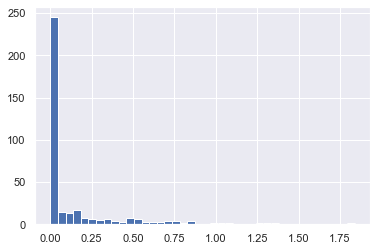

In [13]:
import matplotlib.pyplot as plt
import seaborn;
seaborn.set()
rainfall = pd.read_csv('../data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254
plt.hist(inches,40)

Days which had rainfall between 0.5 and 1.0 inches

In [16]:
np.sum((inches > 0.5) & (inches < 1.0))

29

In [17]:
x

array([0.        , 0.10204082, 0.20408163, 0.30612245, 0.40816327,
       0.51020408, 0.6122449 , 0.71428571, 0.81632653, 0.91836735,
       1.02040816, 1.12244898, 1.2244898 , 1.32653061, 1.42857143,
       1.53061224, 1.63265306, 1.73469388, 1.83673469, 1.93877551,
       2.04081633, 2.14285714, 2.24489796, 2.34693878, 2.44897959,
       2.55102041, 2.65306122, 2.75510204, 2.85714286, 2.95918367,
       3.06122449, 3.16326531, 3.26530612, 3.36734694, 3.46938776,
       3.57142857, 3.67346939, 3.7755102 , 3.87755102, 3.97959184,
       4.08163265, 4.18367347, 4.28571429, 4.3877551 , 4.48979592,
       4.59183673, 4.69387755, 4.79591837, 4.89795918, 5.        ])

In [18]:
x > 3

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [23]:
x[x > 3]

array([3.06122449, 3.16326531, 3.26530612, 3.36734694, 3.46938776,
       3.57142857, 3.67346939, 3.7755102 , 3.87755102, 3.97959184,
       4.08163265, 4.18367347, 4.28571429, 4.3877551 , 4.48979592,
       4.59183673, 4.69387755, 4.79591837, 4.89795918, 5.        ])

## Combining boolean operations masking operation and aggregates.

In [31]:
rainy = (inches > 0)
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0)
# Creaing mask for all summer aays
summer

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [37]:
print("Median precip on rainy days: ", np.median(inches[rainy]))
print("Median on summer days: ", np.median(inches[summer]))
print("Maximum precin on summer days: ", np.max(inches[summer]))
print("Median precin on non summer rainy days: ", np.median(inches[rainy & ~summer]))

Median precip on rainy days:  0.19488188976377951
Median on summer days:  0.0
Maximum precin on summer days:  0.8503937007874016
Median precin on non summer rainy days:  0.20078740157480315


## Fancy indexing

In [44]:
rand = np.random.RandomState(42)
x = rand.randint(100, size=10)
print(x)
[x[3], x[7], x[2]]
ind = [3,  7, 4]
print(x[ind])
ind = np.array([[3,7], [4,5]])
x[ind]

[51 92 14 71 60 20 82 86 74 74]
[71 86 60]


array([[71, 86],
       [60, 20]])